# "Anticipez les besoins en consommation électrique de bâtiments"
_Notebook_

## 0 Preliminaries

### 0.0 Importing Packages and Modules

Checking whether the notebook is on Colab or PC

In [341]:
import sys
is_colab = 'google.colab' in sys.modules
is_colab, sys.executable

(True, '/usr/bin/python3')

Mounting my Drive if on colab

In [342]:
if is_colab==True:
    from google.colab import files, output, drive
    drive.mount('/gdrive')
    %cd /gdrive
    print("You're on Google Colab")
else:
    print("You're on a PC")

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive
You're on Google Colab


Noticing user about files that has to be in the current working directory.

In [ ]:
def file_required(file_name):
    if os.path.exists(os.getcwd()+"/"+file_name):
        print("OK, loading "+file_name+"\
                           from the current working directory ...")
    else:
        print("Please, put "+file_name+"\
                           in the current working directory")

Installations and importations required for Google Colab version.

In [ ]:
# !pip freeze > requirements.txt

In [ ]:
import os

if is_colab==True:
    if os.getcwd()!='/gdrive/My Drive/--DATA SCIENCE/PROJET4':
        os.chdir('My Drive/--DATA SCIENCE/PROJET4')
    !pip install -r requirements.txt
else:
    # make sure 'P4_functions.py' is in the current working directory
    file_required('/P4_functions.py')
    file_required('requirements.txt')
    !pip install -r requirements.txt

In [ ]:
from P4_functions import *

Importation of modules and packages. 

In [ ]:
import io
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.facecolor']='w'

import warnings
warnings.filterwarnings('ignore')

# from ipywidgets import interact, interact_manual

import dill

from sklearn_pandas import DataFrameMapper

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from mlxtend.plotting import plot_pca_correlation_graph
from sklearn.inspection import permutation_importance

import category_encoders as ce

import scipy.stats as st

from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.model_selection import * 
from sklearn.linear_model import *
from sklearn import metrics
from sklearn.compose import make_column_transformer

from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR

Setting pandas display options

In [ ]:
dictPdSettings = {'display.max_rows': 500, 'display.width': 100,
                    'display.max_colwidth': 500,
                    'display.float_format': lambda x: '%.2f' % x}
for k,v in dictPdSettings.items():
    pd.set_option(k,v)

To play audio text-to-speech during execution.

In [ ]:
from IPython.display import Audio
from gtts import gTTS

def speak(text, lang='en'):
    with io.BytesIO() as f:
        gTTS(text=text, lang=lang).write_to_fp(f)
        f.seek(0)
        return Audio(f.read(), autoplay=True)

In [ ]:
plot_enabled = False
save_enabled = False

In [ ]:
speak('Packages and modules successfully imported')

### 0.1 Importing the dataset

In [ ]:
if is_colab==True:
    path_csv = 'DATA/Cleaned_data.csv' 
    # Importing database from my Drive
    print("2. Try to import in notebook from myDrive...")
else:
    path_csv = '../DATA/Cleaned_data.csv'
    # Importing database from a DATA directory
    print("2. Try to import in notebook from PC ('DATA')")

df = pd.read_csv(path_csv, sep=',', index_col='Unnamed: 0',
                 low_memory=True, encoding ='utf-8')

print("-----> importation of .csv in the notebook OK")

2. Try to import in notebook from myDrive...
-----> importation of .csv in the notebook OK


In [ ]:
df.shape

(1651, 65)

In [ ]:
df.columns

Index(['OSEBuildingID', 'DataYear', 'BuildingType', 'PrimaryPropertyType', 'PropertyName',
       'TaxParcelIdentificationNumber', 'CouncilDistrictCode', 'Neighborhood', 'YearBuilt',
       'NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking',
       'PropertyGFABuilding(s)', 'ListOfAllPropertyUseTypes', 'LargestPropertyUseType',
       'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseType',
       'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseType',
       'ThirdLargestPropertyUseTypeGFA', 'YearsENERGYSTARCertified', 'ENERGYSTARScore',
       'SiteEUI(kBtu/sf)', 'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)',
       'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)', 'Electricity(kWh)',
       'Electricity(kBtu)', 'NaturalGas(therms)', 'NaturalGas(kBtu)', 'OtherFuelUse(kBtu)',
       'TotalGHGEmissions', 'GHGEmissionsIntensity', 'DefaultData', 'Comments', 'ComplianceStatus',
       'Outlier', 'ZipCode', 'La

In [ ]:
df['ZipCode'] = df['ZipCode'].apply(str).astype('object')
df['CouncilDistrictCode'] = df['CouncilDistrictCode'].apply(str).astype('object')

In [ ]:
prop_Q_cols = ['NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal',
               'PropertyGFAParking', 'PropertyGFABuilding(s)',
               'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseTypeGFA',
               'ThirdLargestPropertyUseTypeGFA', 'BuildingAge',
               'MeanGFAperFloor', 'ParkingGFARatio', 'NbYearsCertified',
               'ExtsurfVolRatio',
            'Outlier'] # 'ENERGYSTARScore',
prop_C_cols = ['Neighborhood', 'ZipCode', 'CouncilDistrictCode',
               'BuildingType', 'PrimaryPropertyType', 'LargestPropertyUseType',
               'SecondLargestPropertyUseType', 'ThirdLargestPropertyUseType',
               'CertifiedPreviousYear', 'EnergyProfile', 'MainEnergy']
target_cols = ['SiteEnergyUseWN(kBtu)', 'TotalGHGEmissions',
                'SiteEnergyUseWN(kBtu)_log', 'TotalGHGEmissions_log']

In [ ]:
speak('Dataset successfully imported')

### 0.2 Overview

Printing total nb and percentage of null

In [ ]:
print_null_pct(df)

nb of null:  2191 
pct of null:  2.0


Showing columns where there are still NaN values

In [ ]:
df.isna().sum(axis=0)[df.isna().sum(axis=0)!=0]

TaxParcelIdentificationNumber       1
ENERGYSTARScore                   542
Comments                         1648
dtype: int64

In [ ]:
speak('Description overview done')

## 1 Data preprocessing

### 1.1 Target data transformation

We already found in the Cleaning_EDA notebook that the distribution of the target data could become almost normal with logarithmic transformation.

Here are the histograms of transformed values.

#### SiteEnergyUseWN(kBtu)

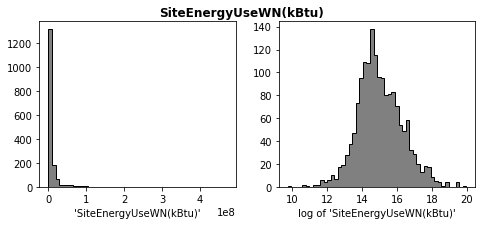

In [ ]:
fig, axs = plt.subplots(1,2)
axs[0].hist(df['SiteEnergyUseWN(kBtu)'], color='grey', ec='k',
            histtype='stepfilled', bins=50);
axs[0].set_xlabel("'SiteEnergyUseWN(kBtu)'")
axs[1].hist(df['SiteEnergyUseWN(kBtu)_log'], color='grey', ec='k',
            histtype='stepfilled', bins=50);
axs[1].set_xlabel("log of 'SiteEnergyUseWN(kBtu)'")


plt.tight_layout(rect=[0,0,1,0.95])
fig.suptitle('SiteEnergyUseWN(kBtu)', fontweight='bold')
fig.set_size_inches(7,3)
plt.show()

#### TotalGHGEmissions

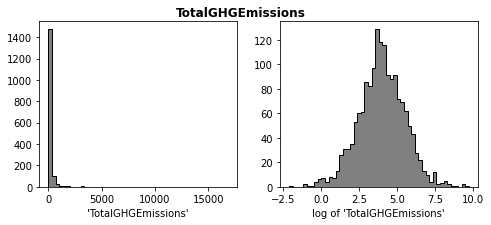

In [ ]:
fig, axs = plt.subplots(1,2)
axs[0].hist(df['TotalGHGEmissions'], color='grey', ec='k',
            histtype='stepfilled', bins=50);
axs[0].set_xlabel("'TotalGHGEmissions'")
axs[1].hist(df['TotalGHGEmissions_log'], color='grey', ec='k',
            histtype='stepfilled', bins=50);
axs[1].set_xlabel("log of 'TotalGHGEmissions'")


plt.tight_layout(rect=[0,0,1,0.95])
fig.suptitle('TotalGHGEmissions', fontweight='bold')
fig.set_size_inches(7,3)
plt.show()

### 1.2 First features selection

#### Quantitative data

Excluding highly correlated quantitative features.
- 'PropertyGFATotal' is strongly correlated with 'PropertyGFABuilding(s)'
- 'PropertyGFABuilding(s)' is strongly correlated with 'LargestPropertyUseTypeGFA'
- 'ExtsurfVolRatio' is strongly correlated with 'NumberofBuildings'

In [ ]:
prop_Q_cols_sel = [c for c in prop_Q_cols if c not in\
                              ['PropertyGFATotal',
                               'PropertyGFABuilding(s)',
                               'ExtsurfVolRatio']]

#### Categorical data

Excluding highly related categorical features.
- 'LargestPropertyUseType'(57) is strongly correlated with 'PrimaryPropertyType'(29)

In [ ]:
prop_C_cols_sel = [c for c in prop_C_cols if c not in ['LargestPropertyUseType']]

### 1.3 Splitting training and testing set 

In [ ]:
df_X = df[prop_Q_cols+prop_C_cols]
df_y1 = df['SiteEnergyUseWN(kBtu)']
df_y2 = df['TotalGHGEmissions']

We want to evaluate our model at the end on various 'BuildingType'. We then split the data with stratification using this column.

In [ ]:
''' 'Neighborhood', 'CouncilDistrictCode', 'ZipCode', 'Outlier', 'BuildingType',
'PrimaryPropertyType', 'EnergyProfile', 'MainEnergy', 'CertifiedPreviousYear' '''

group_col = 'BuildingType'

X_tr, X_te, y1_tr, y1_te = train_test_split(df_X, df_y1,
                                            train_size=0.8, shuffle=True,
                                            stratify=df[group_col],
                                            random_state=14)

In [ ]:
y1_log_tr, y1_log_te  = np.log(y1_tr), np.log(y1_te)

Training and testing set for linear regression (avoiding colinearity)

In [ ]:
X_tr_sel = X_tr[prop_Q_cols_sel+prop_C_cols_sel]
X_te_sel = X_te[prop_Q_cols_sel+prop_C_cols_sel]

Printing the quantitative and categorical independent columns:

In [ ]:
print(f'--- {X_tr.columns.shape[0]} independent columns ---\
\nquantitative ({len(prop_Q_cols)}): {prop_Q_cols},\
\ncategorical ({len(prop_C_cols)}): {prop_C_cols}')

--- 25 independent columns ---
quantitative (14): ['NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking', 'PropertyGFABuilding(s)', 'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseTypeGFA', 'BuildingAge', 'MeanGFAperFloor', 'ParkingGFARatio', 'NbYearsCertified', 'ExtsurfVolRatio', 'Outlier'],
categorical (11): ['Neighborhood', 'ZipCode', 'CouncilDistrictCode', 'BuildingType', 'PrimaryPropertyType', 'LargestPropertyUseType', 'SecondLargestPropertyUseType', 'ThirdLargestPropertyUseType', 'CertifiedPreviousYear', 'EnergyProfile', 'MainEnergy']


In [ ]:
print("--- columns missing in prop_Q_cols_sel and prop_C_cols_sel ---\n" ,
      set(X_tr.columns) - set(X_tr_sel.columns))

--- columns missing in prop_Q_cols_sel and prop_C_cols_sel ---
 {'LargestPropertyUseType', 'PropertyGFABuilding(s)', 'ExtsurfVolRatio', 'PropertyGFATotal'}


### 1.4 Feature transformations

__Quantitative data__

Standardizing the quantitative values.

__Categorical data__

Categorical data are all nominal data, none of them are ordinal. We'll choose between:
- Ordinal Encoding (boolean): 'CertifiedPreviousYear'(2)
- One-Hot Encoding (low cardinality):
'BuildingType'(5), 'MainEnergy'(3), 'EnergyProfile'(8)
- Binary or Hashing or Leave-One-Out target encoding (high cardinality):
('Neighborhood', 'LargestPropertyUseType',
 'SecondLargestPropertyUseType',
 'ThirdLargestPropertyUseType', 'PrimaryPropertyType')

 NB: The transformation of the columns is all included in the Class CustTransformer (see P4_funtions.py file).

## 2 First model selection

In [ ]:
#  # TESTS RAPIDES
# my_knn = KNeighborsRegressor(n_neighbors=5)

# cust_trans = CustTransformer(thresh_card=12,
#                              strat_binary='ord',
#                              strat_low_card='ohe',
#                              strat_high_card='hash',
#                              strat_quant='stand').fit(X_tr, y1_tr)
# X_tr_enc = cust_trans.transform(X_tr)
# my_knn.fit(X_tr_enc, y1_tr)
# X_te_enc = cust_trans.transform(X_te)
# y1_te_pr = my_knn.predict(X_te_enc)

# scores_reg('my_knn', X_te_enc, y1_te, y1_te_pr)

### 2.0 Dummy Regressor baseline

In [ ]:
df_res = pd.DataFrame(dtype = 'object')
dict_models = {}

In [ ]:
from sklearn.dummy import DummyRegressor

reg = DummyRegressor()
name_reg = 'Dummy'

param_grid={'preproc__strat_binary': ['ord'],
            'preproc__strat_low_card': ['bin'], # 'bin', 'bin', 'ohe'
            'preproc__strat_high_card': ['bin'], # bin', 'bin', 'ohe'
            'preproc__strat_quant': ['stand'],  #'stand', 'minmax', 'maxabs', 'robust', 'norm', 'quant_uni', 'quant_norm', 'pow'
            name_reg+'__strategy': ['mean', 'median']}

dict_models[name_reg] = model_optimizer(CustTransformer(thresh_card=12),
                     name_reg, reg, param_grid,
                     X_tr, y1_tr,
                     cv_search=GroupKFold(n_splits=4),
                     groups=X_tr[group_col],
                     scv_scores = ['neg_root_mean_squared_error', 
                                   'neg_mean_absolute_error',
                                   'r2'],
                     search_strat='grid')

new_df_res = scv_perf_fetcher(name_reg, dict_models[name_reg])
df_res = pd.concat([df_res, new_df_res], axis=1)

Grid
Fitting 4 folds for each of 24 candidates, totalling 96 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  96 out of  96 | elapsed:   59.4s finished


### 2.1 KNN Regressor

In [ ]:
reg = KNeighborsRegressor()
name_reg = 'KNN'
param_grid={'preproc__strat_binary': ['ord'],
            'preproc__strat_low_card': ['ohe'], # 'bin', 'ohe'
            'preproc__strat_high_card': ['ord'], # 'hash', 'loo', 'ord'
            'preproc__strat_quant': ['stand'], # 'stand', 'minmax', 'maxabs', 'robust', 'norm', 'quant_uni', 'quant_norm', 'pow'
            name_reg+'__n_neighbors': [1,2,3,15,17], # 1,2,3,5,7,9,11,15,17
            name_reg+'__p': [1]} # 0,1,2
            reg = KNeighborsRegressor()

# refit is set by default with 'neg_root_mean_squared_error'
dict_models[name_reg]  = model_optimizer(CustTransformer(thresh_card=12),
                    name_reg, reg, param_grid,
                    X_tr[cols], y1_tr,
                    cv_search=GroupKFold(n_splits=4),
                    groups=X_tr[group_col],
                    scv_scores = ['neg_root_mean_squared_error', 
                                'neg_mean_absolute_error',
                                    'r2'],
                    search_strat='grid',
                    verbose=0)#, n_iter=50)

new_df_res = scv_perf_fetcher(name_reg, dict_models[name_reg])
df_res = pd.concat([df_res, new_df_res], axis=1)

Grid
Fitting 4 folds for each of 5 candidates, totalling 20 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:   45.4s finished


In [ ]:
# file = open(os.getcwd()+'/P4_Best_KNN.pkl', 'rb')
# knn_gscv = dill.load(file)
# new_df_res = scv_perf_fetcher('best_KNN', knn_gscv, X_te, y1_te)
# df_res = pd.concat([df_res, new_df_res], axis=1)
# df_res

### Learning curves

In [ ]:
model = knn_gscv.best_estimator_
label = "knn_regressor"
%matplotlib
fig = plot_learning_curve(model, X_tr, y1_tr,
                          train_sizes=np.linspace(0.1,1,30),
                          scoring="neg_mean_squared_error", label=label,
                          c='b') #, fig=fig # to add the curve to existing figure
%matplotlib inline
fig

In [ ]:
model = enet_gscv.best_estimator_
label = "enet_regressor"
%matplotlib
fig = plot_learning_curve(model, X_tr, y1_tr,
                          train_sizes=np.linspace(0.1,1,30),
                          scoring="neg_mean_squared_error", label=label,
                          c='r', fig = fig)
%matplotlib inline
fig